<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,66.537972,-61.432059,15.105912,72.265464,-57.159552
1,0.0,1.0,67.530928,-4.791526,72.739402,73.163679,-0.424276
2,0.0,2.0,31.521425,-21.374994,20.146431,40.589985,-20.443554
3,0.0,3.0,81.313811,62.524655,153.838467,85.631482,68.206984
4,0.0,4.0,24.825785,-15.515388,19.310397,34.533203,-15.222805
...,...,...,...,...,...,...,...
19995,999.0,15.0,80.893969,32.505762,123.399731,86.491575,36.908155
19996,999.0,16.0,25.554668,-33.865166,1.689502,-8.426750,10.116252
19997,999.0,17.0,36.475511,-17.685043,28.790468,10.304751,18.485717
19998,999.0,18.0,88.018747,-86.808008,11.210739,98.712040,-87.501301


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y      y_hat      e_hat
rep   index                                                        
0.0   0.0    66.537972 -61.432059   15.105912  72.265464 -57.159552
      1.0    67.530928  -4.791526   72.739402  73.163679  -0.424276
      2.0    31.521425 -21.374994   20.146431  40.589985 -20.443554
      3.0    81.313811  62.524655  153.838467  85.631482  68.206984
      4.0    24.825785 -15.515388   19.310397  34.533203 -15.222805
...                ...        ...         ...        ...        ...
999.0 15.0   80.893969  32.505762  123.399731  86.491575  36.908155
      16.0   25.554668 -33.865166    1.689502  -8.426750  10.116252
      17.0   36.475511 -17.685043   28.790468  10.304751  18.485717
      18.0   88.018747 -86.808008   11.210739  98.712040 -87.501301
      19.0   53.480598  30.087366   93.567964  39.471985  54.095979

[20000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y      y_hat      e_hat
rep   index                                                        
0.0   0.0    66.537972 -61.432059   15.105912  72.265464 -57.159552
      1.0    67.530928  -4.791526   72.739402  73.163679  -0.424276
      2.0    31.521425 -21.374994   20.146431  40.589985 -20.443554
      3.0    81.313811  62.524655  153.838467  85.631482  68.206984
      4.0    24.825785 -15.515388   19.310397  34.533203 -15.222805
...                ...        ...         ...        ...        ...
999.0 15.0   80.893969  32.505762  123.399731  86.491575  36.908155
      16.0   25.554668 -33.865166    1.689502  -8.426750  10.116252
      17.0   36.475511 -17.685043   28.790468  10.304751  18.485717
      18.0   88.018747 -86.808008   11.210739  98.712040 -87.501301
      19.0   53.480598  30.087366   93.567964  39.471985  54.095979

[20000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,66.537972,-61.432059,15.105912,72.265464,-57.159552
1,0.0,1.0,67.530928,-4.791526,72.739402,73.163679,-0.424276
2,0.0,2.0,31.521425,-21.374994,20.146431,40.589985,-20.443554
3,0.0,3.0,81.313811,62.524655,153.838467,85.631482,68.206984
4,0.0,4.0,24.825785,-15.515388,19.310397,34.533203,-15.222805
...,...,...,...,...,...,...,...
19995,999.0,15.0,80.893969,32.505762,123.399731,86.491575,36.908155
19996,999.0,16.0,25.554668,-33.865166,1.689502,-8.426750,10.116252
19997,999.0,17.0,36.475511,-17.685043,28.790468,10.304751,18.485717
19998,999.0,18.0,88.018747,-86.808008,11.210739,98.712040,-87.501301


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1          e           Y      y_hat      e_hat
rep   index                                                        
0.0   0.0    66.537972 -61.432059   15.105912  72.265464 -57.159552
      1.0    67.530928  -4.791526   72.739402  73.163679  -0.424276
      2.0    31.521425 -21.374994   20.146431  40.589985 -20.443554
      3.0    81.313811  62.524655  153.838467  85.631482  68.206984
      4.0    24.825785 -15.515388   19.310397  34.533203 -15.222805
...                ...        ...         ...        ...        ...
999.0 15.0   80.893969  32.505762  123.399731  86.491575  36.908155
      16.0   25.554668 -33.865166    1.689502  -8.426750  10.116252
      17.0   36.475511 -17.685043   28.790468  10.304751  18.485717
      18.0   88.018747 -86.808008   11.210739  98.712040 -87.501301
      19.0   53.480598  30.087366   93.567964  39.471985  54.095979

[20000 rows x 5 columns]

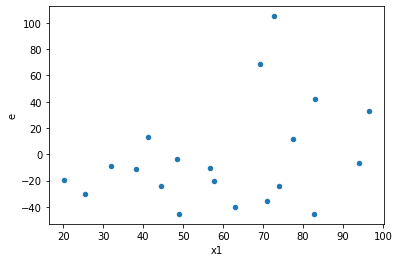

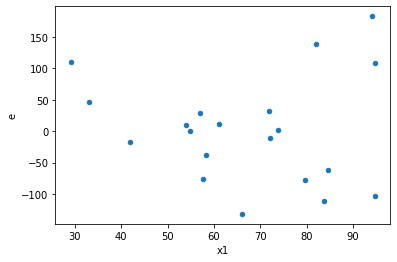

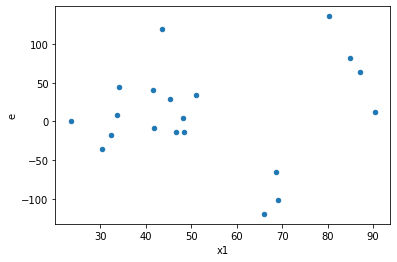

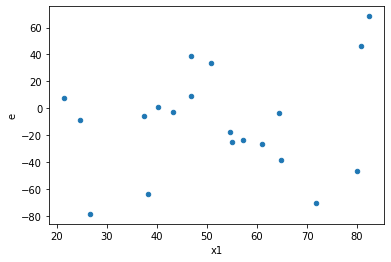

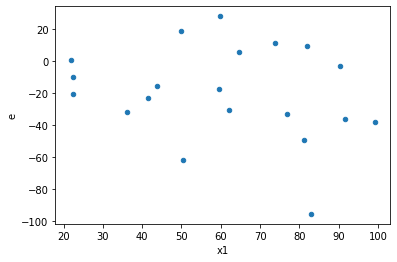

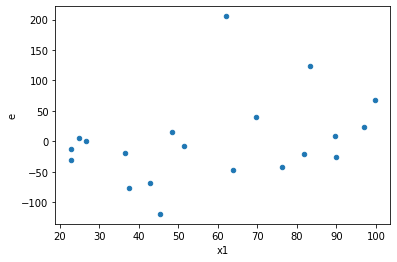

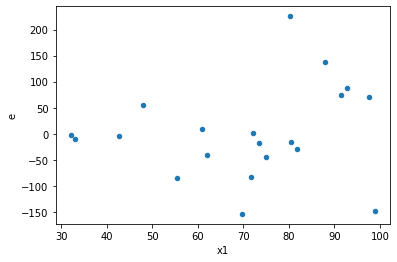

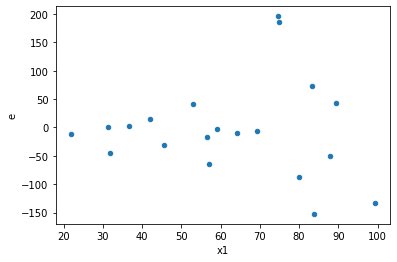

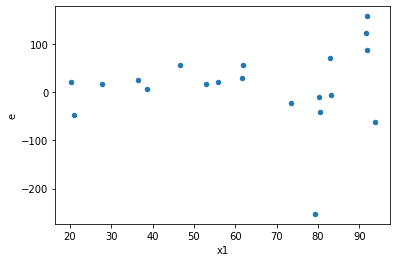

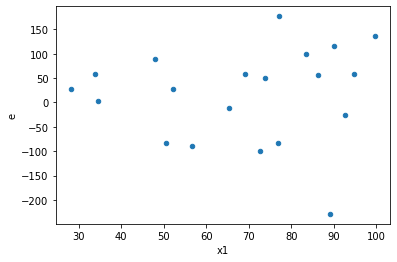

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,12.0,6.0,4531.857949457658,89608.44402042663,377.6548291214715,14934.740670071105,39.546007407911084,0.00020799185053088642,0.9998960040747346,0.00010399592526544321,Reject005=0 : Heteroscedasticity
4.0,6.0,12.0,5495.877559261134,48160.196001159085,915.9795932101889,4013.349666763257,4.381483710458949,0.028465976470333,0.9857670117648335,0.0142329882351665,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,10660.895605729505,54350.65299161505,1184.5439561921673,6038.961443512783,5.09813199581518,0.0235104879699648,0.9882447560150176,0.0117552439849824,Reject005=0 : Heteroscedasticity
8.0,8.0,10.0,4007.240152743185,59718.89429045474,500.9050190928981,5971.889429045474,11.922199222240023,0.0006736236801796469,0.9996631881599102,0.00033681184008982346,Reject005=0 : Heteroscedasticity
9.0,9.0,9.0,26380.051346622084,43744.7082454516,2931.1168162913427,4860.523138383511,1.6582495488983582,0.46286454628782137,0.7685677268560893,0.23143227314391068,Reject005=1 : Homoscedasticity
10.0,9.0,9.0,2262.9732024267796,23096.129143077545,251.44146693630884,2566.2365714530606,10.206099267242578,0.0019260590166620961,0.999036970491669,0.0009630295083310481,Reject005=0 : Heteroscedasticity
15.0,9.0,9.0,15527.103697918614,56601.14364491614,1725.2337442131793,6289.015960546238,3.6453123999232027,0.06745464017181035,0.9662726799140948,0.03372732008590518,Reject005=1 : Homoscedasticity
17.0,9.0,9.0,8334.08860262733,108338.89520383406,926.0098447363699,12037.655022648229,12.999489250651848,0.000746893196354792,0.9996265534018226,0.000373446598177396,Reject005=0 : Heteroscedasticity
19.0,6.0,12.0,21223.681822456514,145421.24256735353,3537.2803037427525,12118.436880612795,3.425919305233014,0.06601420091716403,0.966992899541418,0.03300710045858202,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,7.0,92584.20239181648,11785.970408849764,8416.745671983315,1683.710058407109,0.20004288165812678,0.018382869250961692,Reject005=0 : Heteroscedasticity
1.0,7.0,11.0,36740.58586358527,11093.500326830945,5248.655123369324,1008.5000297119041,0.19214446482140116,0.03809485479269173,Reject005=0 : Heteroscedasticity
2.0,8.0,10.0,23749.230171694886,28255.35630779609,2968.6537714618607,2825.535630779609,0.9517902215279973,0.9630201552897113,Reject005=1 : Homoscedasticity
3.0,12.0,6.0,4531.857949457658,89608.44402042663,377.6548291214715,14934.740670071105,39.546007407911084,0.00020799185053088642,Reject005=0 : Heteroscedasticity
4.0,6.0,12.0,5495.877559261134,48160.196001159085,915.9795932101889,4013.349666763257,4.381483710458949,0.028465976470333,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,10660.895605729505,54350.65299161505,1184.5439561921673,6038.961443512783,5.09813199581518,0.0235104879699648,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,25074.950061935662,15417.972740117633,2786.1055624372957,1713.1080822352926,0.6148755112985235,0.4800588281171151,Reject005=1 : Homoscedasticity
7.0,14.0,4.0,79837.913727596,12167.211011627585,5702.708123399714,3041.8027529068963,0.5333961842489497,0.3417839028623211,Reject005=1 : Homoscedasticity
8.0,8.0,10.0,4007.240152743185,59718.89429045474,500.9050190928981,5971.889429045474,11.922199222240023,0.0006736236801796469,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    508
Reject005=1 : Homoscedasticity      492
Name: Result_test, dtype: int64